In [96]:
import tensorflow as tf

In [97]:
from tensorflow.examples.tutorials.mnist import  input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [98]:
import numpy as np

In [99]:
import matplotlib.pyplot as plt

In [100]:
mnist.train.images.shape

(55000, 784)

In [101]:
mnist.train.labels.shape

(55000, 10)

In [102]:
image1=mnist.train.images[5699]
image1=np.array(image1,float)
image1=image1.reshape((28,28))

<function matplotlib.pyplot.show(*args, **kw)>

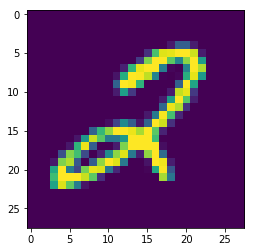

In [103]:
plt.imshow(image1)
plt.show

In [104]:
tf.random_normal(shape=(2,3))

<tf.Tensor 'random_normal_28:0' shape=(2, 3) dtype=float32>

In [105]:
n_input=784
n_hl1=256
n_hl2=256
n_output=10

weights={
    'h1':tf.Variable(tf.random_normal(shape=(n_input,n_hl1))),
    'h2':tf.Variable(tf.random_normal(shape=(n_hl1,n_hl2))),
    'out':tf.Variable(tf.random_normal(shape=(n_hl2,n_output)))
}
biases={
    'h1':tf.Variable(tf.random_normal(shape=(n_hl1,))),
    'h2':tf.Variable(tf.random_normal(shape=(n_hl2,))),
    'out':tf.Variable(tf.random_normal(shape=(n_output,)))
}

In [106]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

In [107]:


x=tf.placeholder('float',[None,784])#since no of input instance is different for training and testing
y=tf.placeholder(tf.int32,[None,10])

pred=fwd_prop(x,weights,biases)
# predictions=tf.argmax(pred,1)
# true_labels=tf.argmax(y,1)
# correct_preds=tf.equal(predictions,true_labels)



In [108]:
# correct_ones=sess.run(correct_preds,feed_dict={x:mnist.train.images,y:mnist.train.labels})
# correct_ones.sum()

In [109]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [110]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)

In [111]:
optimize=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [112]:
batch_size=100
for i in range(25):
    num_batches=mnist.train.num_examples//batch_size
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)    

25970.2060767
4999.2589985
2788.88465377
1780.03568908
1550.0769923
1231.56559181
1097.30333538
1071.00596283
964.670480156
847.220383699
631.550407512
552.434492796
627.340262825
487.708484735
515.302835994
400.247369593
374.428572413
428.087231357
315.842147176
284.523087146
266.922788708
248.44554228
160.822877604
173.356759697
232.400630655


In [113]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_preds=tf.equal(predictions,true_labels)
correct_ones=sess.run(correct_preds,feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_ones.sum()

9663